In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
transactions = pd.read_csv("retail/transactions.csv", parse_dates=["date"])

transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


<Axes: >

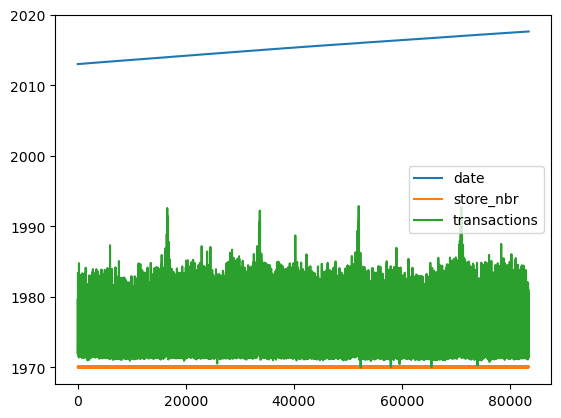

In [3]:
transactions.plot()

In [4]:
transactions.set_index('date').loc['2013-01','transactions']

date
2013-01-01     770
2013-01-02    2111
2013-01-02    2358
2013-01-02    3487
2013-01-02    1922
              ... 
2013-01-31    2432
2013-01-31    1573
2013-01-31    2153
2013-01-31    1524
2013-01-31     714
Name: transactions, Length: 1381, dtype: int64

<Axes: xlabel='date'>

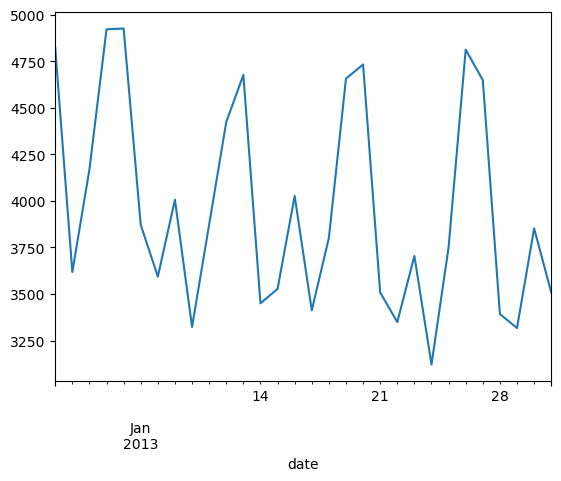

In [5]:
(
transactions
.query('store_nbr == 44')
.set_index('date')
.loc['2013-01','transactions']
.plot()
)


In [6]:
transactions_44 = transactions.loc[transactions['store_nbr'] == 44,['date','transactions']]

<Axes: xlabel='date'>

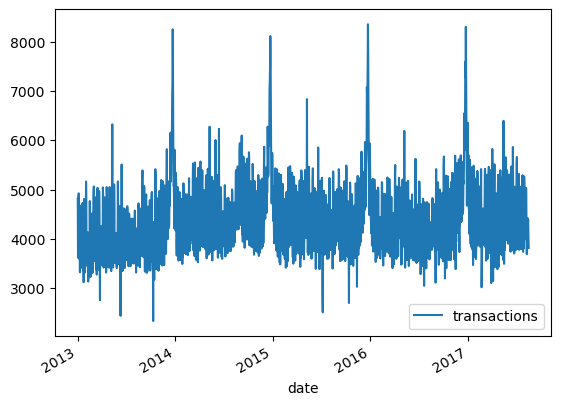

In [7]:
transactions_44.set_index('date').plot()

<Axes: xlabel='date'>

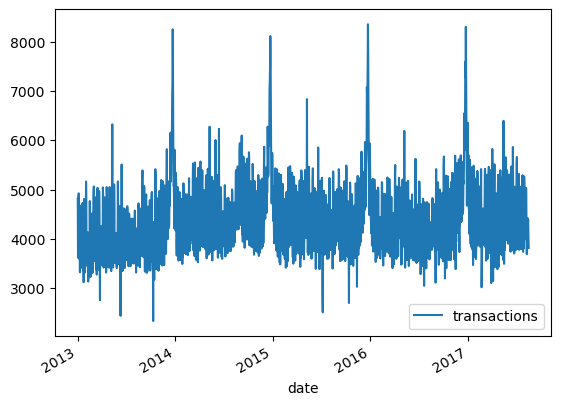

In [8]:
transactions_44.plot(
    x='date',
    y='transactions'
)

<Axes: xlabel='transactions'>

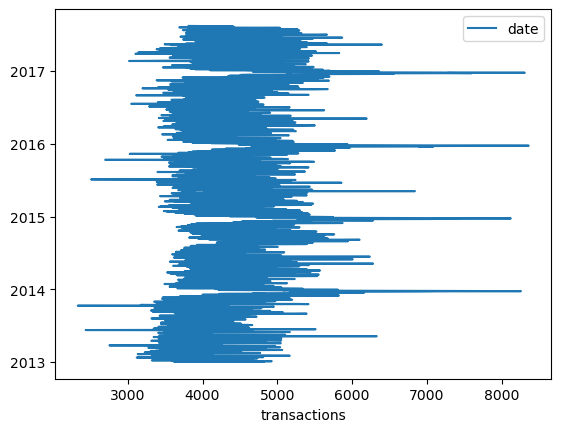

In [9]:
transactions_44.plot(
    x='transactions',
    y='date'
)

<Axes: xlabel='date'>

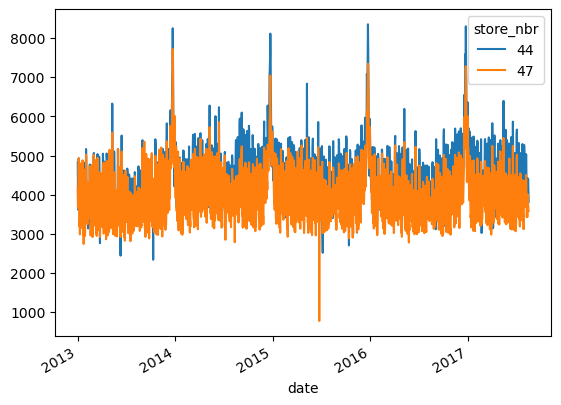

In [10]:
(
    transactions
    .query('store_nbr in [44,47]')
    .pivot_table(
        index='date',
        columns='store_nbr'
    )
    .droplevel(0,axis=1)
    .plot()
)

<Axes: title={'center': 'Store 44 Transactions 2013 - 2017'}, xlabel='Date', ylabel='Daily Transactions'>

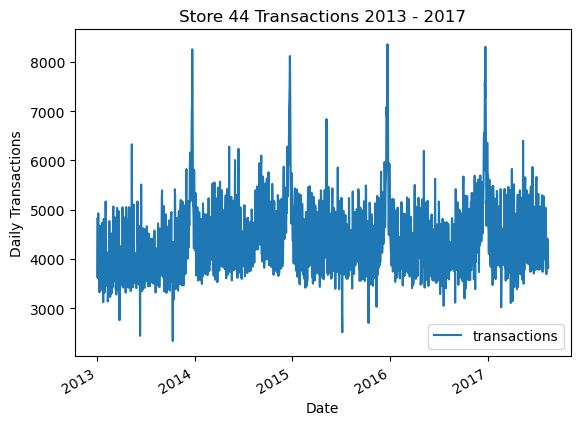

In [11]:
transactions_44.set_index('date').plot(
    title='Store 44 Transactions 2013 - 2017',
    xlabel= 'Date',
    ylabel= 'Daily Transactions'

)

<Axes: title={'center': 'Store 44 Transactions 2013 - 2017'}, xlabel='Date', ylabel='Daily Transactions'>

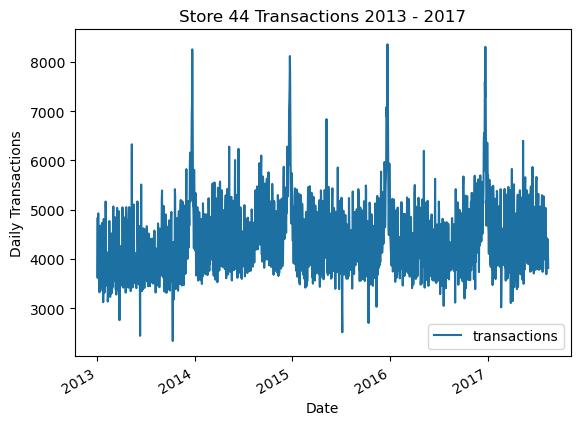

In [12]:
transactions_44.set_index('date').plot(
    title='Store 44 Transactions 2013 - 2017',
    xlabel= 'Date',
    ylabel= 'Daily Transactions',
    color= '#1D70A2'
)

In [13]:
transactions_44_47 = (
    transactions
    .query('store_nbr in [44,47] and date.dt.year == 2014')
    .pivot_table(
        index='date',
        columns='store_nbr'
    )
    .droplevel(0,axis=1)
)

<Axes: xlabel='date'>

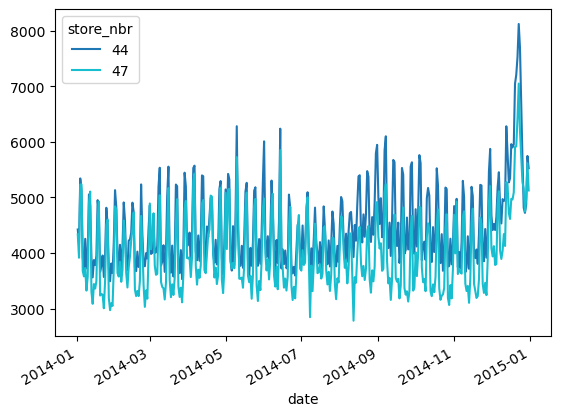

In [14]:
    transactions_44_47.plot(
        colormap='tab10'
    )

<Axes: xlabel='date'>

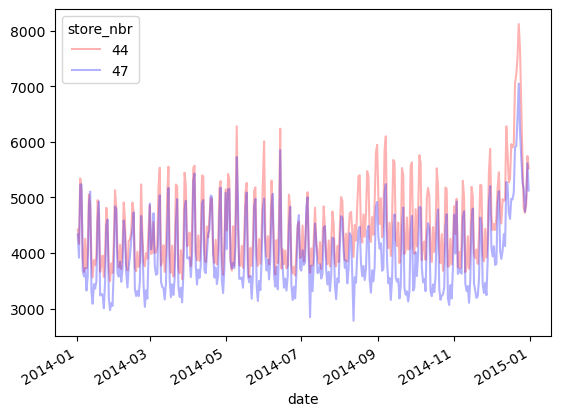

In [15]:
transactions_44_47.plot(
        color=['red','blue'],
        alpha=.3
    )

<Axes: xlabel='date'>

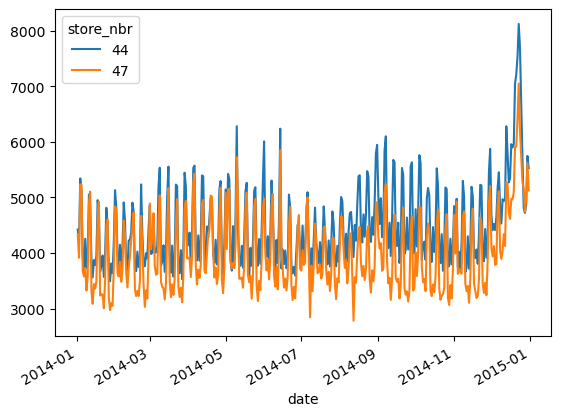

In [16]:
transactions_44_47.plot()

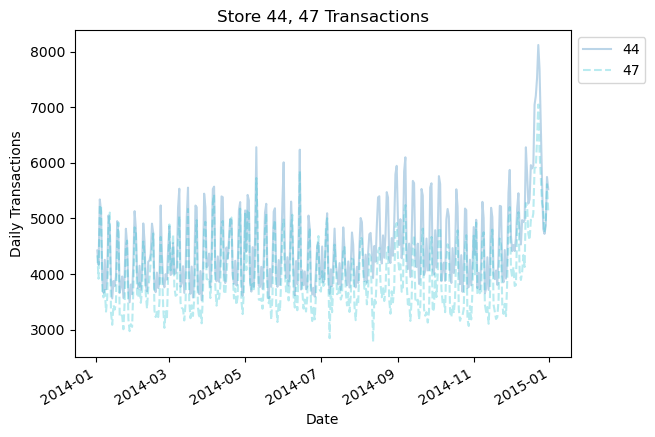

In [17]:
(
    transactions_44_47
    .plot(
    title='Store 44, 47 Transactions',
    xlabel='Date',
    ylabel='Daily Transactions',
    colormap='tab10',
    alpha=.3,
    style=['-','--'],
    #grid=True

    )
    .legend(
        #loc='center left'
        bbox_to_anchor=(1,1)
    )

)


In [18]:
sns.set_style('darkgrid')

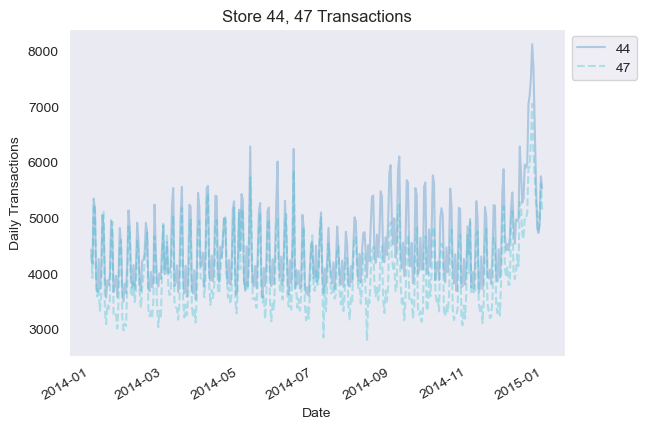

In [19]:
(
    transactions_44_47
    .plot(
    title='Store 44, 47 Transactions',
    xlabel='Date',
    ylabel='Daily Transactions',
    colormap='tab10',
    alpha=.3,
    style=['-','--'],
    grid=False,
    )
    .legend(
        #loc='center left'
        bbox_to_anchor=(1,1)
    )

)

array([[<Axes: xlabel='Date', ylabel='Daily Transactions'>,
        <Axes: xlabel='Date', ylabel='Daily Transactions'>]], dtype=object)

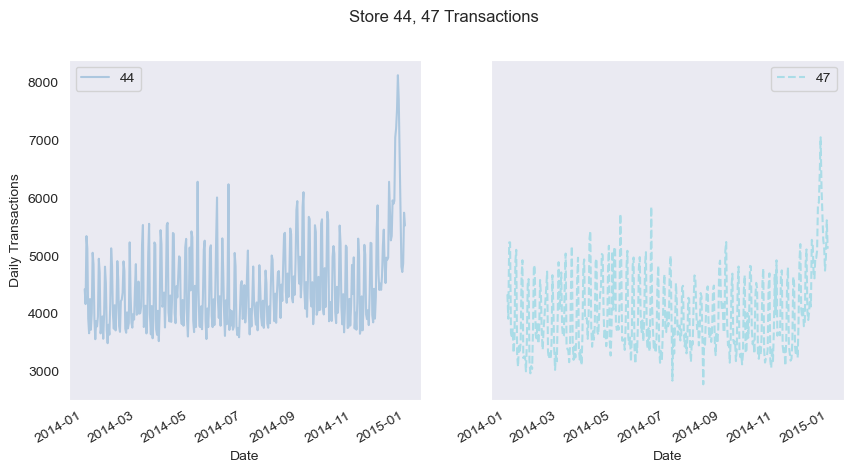

In [20]:
(
    transactions_44_47
    .plot(
    title='Store 44, 47 Transactions',
    xlabel='Date',
    ylabel='Daily Transactions',
    colormap='tab10',
    alpha=.3,
    style=['-','--'],
    grid=False,
    subplots=True,
    layout=(1,2),
    sharey=True,
    figsize=(10,5)
    )
)

<Axes: xlabel='store_nbr'>

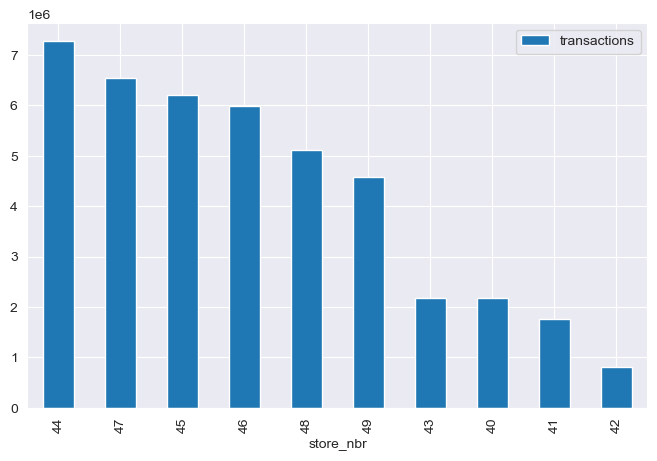

In [21]:
store_40s = list(range(40,50))

(
    transactions
    .query('store_nbr in @store_40s')
    .groupby('store_nbr')
    .agg({'transactions':'sum'})
    .sort_values(by='transactions',ascending=False)
    .plot.bar(
        figsize=(8,5)
    )
)

<Axes: ylabel='store_nbr'>

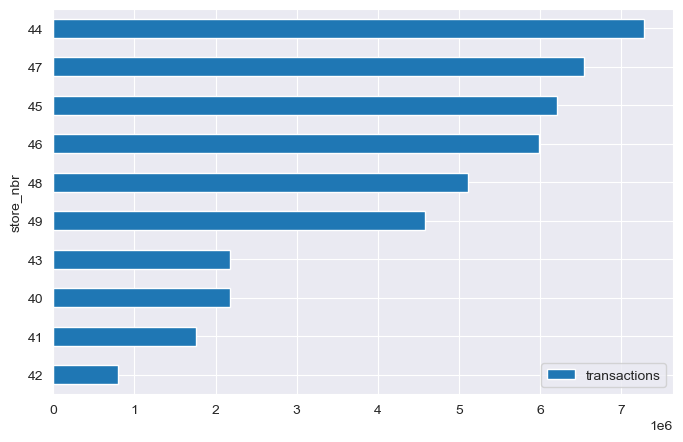

In [22]:
(
transactions
.query('store_nbr in @store_40s')
.groupby('store_nbr')
.agg({'transactions':'sum'})
.sort_values(by='transactions')
.plot.barh(
    figsize=(8,5)
)
)

In [23]:
transactions

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


<Axes: xlabel='date'>

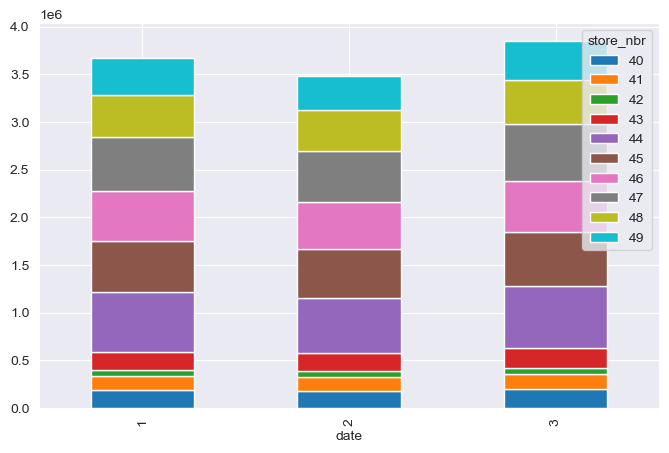

In [24]:
(
    transactions
    .query('store_nbr in @store_40s and date.dt.month in [1,2,3]')
    .pivot_table(
        index=transactions['date'].dt.month,
        columns=transactions['store_nbr'],
        values='transactions',
        aggfunc='sum'
    )
    .plot.bar(
        figsize=(8,5),
        stacked=True
    )
)

<Axes: xlabel='date'>

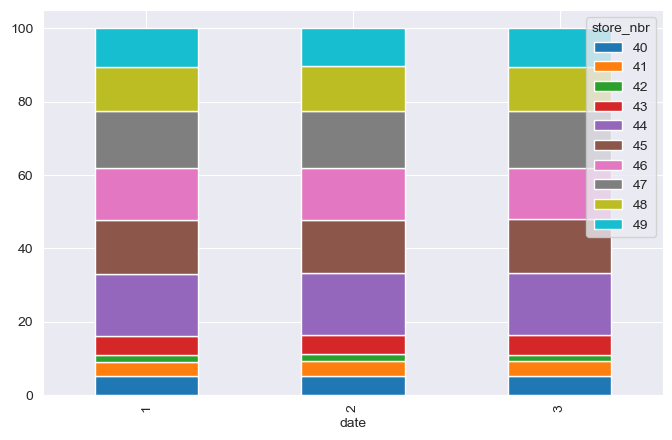

In [25]:
(
    transactions
    .query('store_nbr in @store_40s and date.dt.month in [1,2,3]')
    .pivot_table(
        index=transactions['date'].dt.month,
        columns=transactions['store_nbr'],
        values='transactions',
        aggfunc='sum'
    )
    .apply(lambda x: x * 100 / sum(x),axis=1)
    .plot.bar(
        figsize=(8,5),
        stacked=True
    )
)

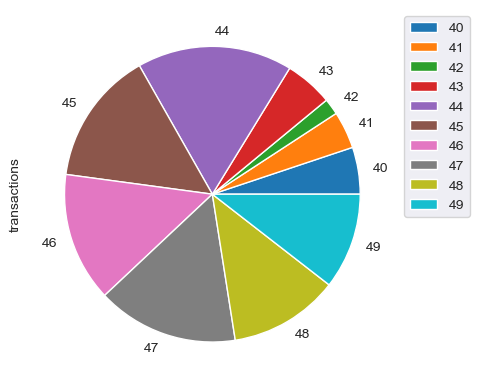

In [35]:
(
transactions
.query('store_nbr in @store_40s and date.dt.month in [1,2,3]')
.groupby('store_nbr')
.agg({'transactions':'sum'})
.plot.pie(
    y='transactions'
).legend(bbox_to_anchor=(1,1))
)

<Axes: xlabel='44', ylabel='47'>

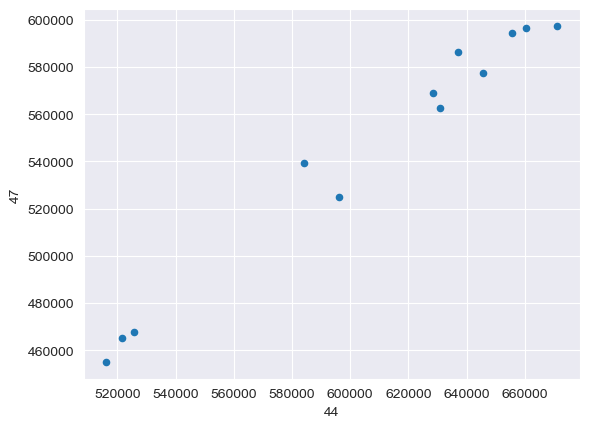

In [45]:
(
transactions
.query('store_nbr in @store_40s')
.pivot_table(
    index=transactions['date'].dt.month,
    columns='store_nbr',
    values='transactions',
    aggfunc='sum'
)
.plot.scatter(x=44,y=47)
)

In [49]:
transactions.loc[:,'transactions']

0         770
1        2111
2        2358
3        3487
4        1922
         ... 
83483    2804
83484    1573
83485    2255
83486     932
83487     802
Name: transactions, Length: 83488, dtype: int64

<Axes: ylabel='Frequency'>

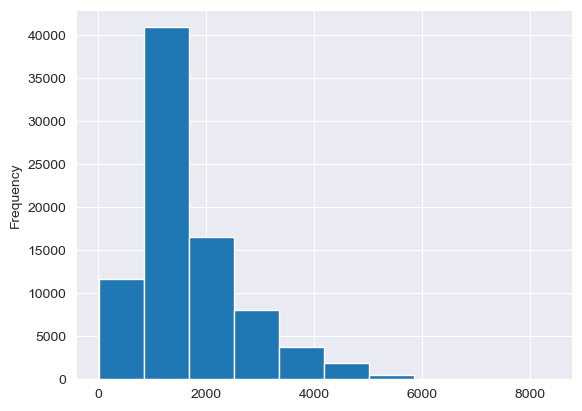

In [50]:
transactions.loc[:,'transactions'].plot.hist()

In [51]:
transactions.loc[transactions['store_nbr'] == 47,'transactions']

41       4161
87       3660
133      3915
179      4764
225      4935
         ... 
83264    4009
83318    3825
83372    3741
83426    3606
83480    3581
Name: transactions, Length: 1677, dtype: int64

<Axes: ylabel='Frequency'>

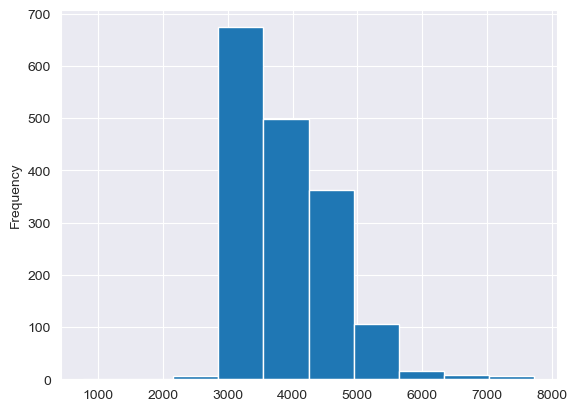

In [54]:
transactions.loc[transactions['store_nbr'] == 47,'transactions'].plot.hist()


In [55]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


AttributeError: 'numpy.ndarray' object has no attribute 'figure'

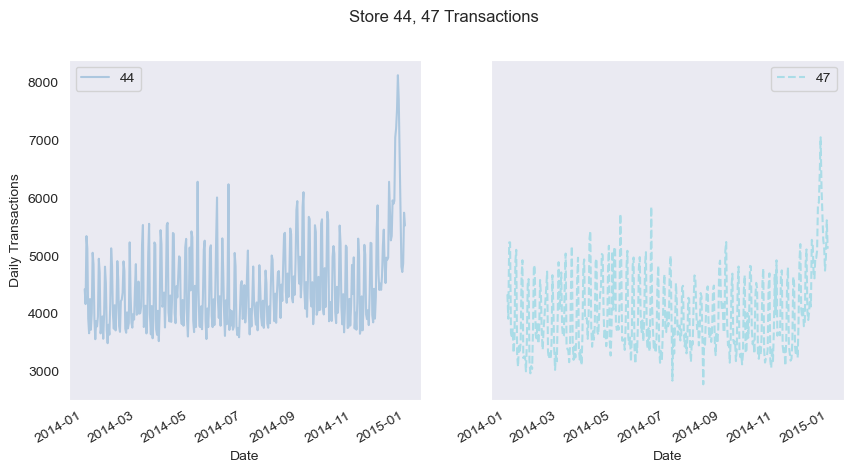

In [62]:
polt = (
    transactions_44_47
    .plot(
    title='Store 44, 47 Transactions',
    xlabel='Date',
    ylabel='Daily Transactions',
    colormap='tab10',
    alpha=.3,
    style=['-','--'],
    grid=False,
    subplots=True,
    layout=(1,2),
    sharey=True,
    figsize=(10,5)
    )
)

polt.figure.savefig('plt.png',bbox_inches='tight')

In [59]:
plt

array([[<Axes: xlabel='Date', ylabel='Daily Transactions'>,
        <Axes: xlabel='Date', ylabel='Daily Transactions'>]], dtype=object)